# Housing Data EDA

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/data (1).csv')

In [13]:
df.head()

,bathrooms,bedrooms,city,homestatus,hometype,livingarea,price,rentzestimate,zipcode
0,1,0.00,Santa Monica,FOR_SALE,LOT,22,$1,"$4,682",90404
1,0,1.00,Santa Monica,FOR_SALE,SINGLE_FAMILY,231,"$3,960","$1,333",90401
2,1,1.00,Santa Monica,FOR_SALE,CONDO,588,"$649,000","$2,721",90404
3,1,1.00,Santa Monica,FOR_SALE,CONDO,805,"$867,000","$3,681",90403
4,1,1.00,Santa Monica,FOR_SALE,CONDO,880,"$795,000","$3,845",90405


In [14]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set(context="notebook", style="whitegrid")

In [15]:
print("Shape:", df.shape)
display(df.head(10))
display(df.tail(3))
df.info()
print("\nDuplicate rows:", df.duplicated().sum())

Shape: (83, 9)


,bathrooms,bedrooms,city,homestatus,hometype,livingarea,price,rentzestimate,zipcode
0,1,0.00,Santa Monica,FOR_SALE,LOT,22,$1,"$4,682",90404
1,0,1.00,Santa Monica,FOR_SALE,SINGLE_FAMILY,231,"$3,960","$1,333",90401
2,1,1.00,Santa Monica,FOR_SALE,CONDO,588,"$649,000","$2,721",90404
3,1,1.00,Santa Monica,FOR_SALE,CONDO,805,"$867,000","$3,681",90403
4,1,1.00,Santa Monica,FOR_SALE,CONDO,880,"$795,000","$3,845",90405
5,1,1.00,Santa Monica,FOR_SALE,CONDO,1043,"$639,900","$4,437",90403
6,1,2.00,Houston,FOR_SALE,MULTI_FAMILY,1496,"$150,000",$890,77026
7,2,2.00,Houston,FOR_SALE,CONDO,1955,"$274,900","$3,256",77056
8,2,2.00,Santa Monica,FOR_SALE,CONDO,850,"$965,000","$3,884",90405
9,2,2.00,Santa Monica,FOR_SALE,CONDO,918,"$1,049,000","$4,217",90403


,bathrooms,bedrooms,city,homestatus,hometype,livingarea,price,rentzestimate,zipcode
80,13,7.00,Santa Monica,FOR_SALE,SINGLE_FAMILY,22640,"$59,950,000","$231,379",90402
81,15,16.00,Santa Monica,FOR_SALE,MULTI_FAMILY,8498,"$3,500,000",NaN,90404
82,42,78.00,Santa Monica,FOR_SALE,MULTI_FAMILY,4840,"$2,295,000","$2,559",90404


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      83 non-null     int64  
 1   bedrooms       82 non-null     float64
 2   city           83 non-null     object 
 3   homestatus     83 non-null     object 
 4   hometype       83 non-null     object 
 5   livingarea     83 non-null     int64  
 6   price          83 non-null     object 
 7   rentzestimate  69 non-null     object 
 8   zipcode        83 non-null     int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 6.0+ KB

Duplicate rows: 0


In [16]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r'\s+', '_', regex=True)
)

In [17]:
def money_to_float(series):
    return (series.astype(str)
            .str.replace(r'[\$,]', '', regex=True)
            .str.strip()
            .replace({'': np.nan})
            .pipe(pd.to_numeric, errors='coerce'))

In [18]:

if 'price' in df.columns:
    df['price'] = money_to_float(df['price'])
if 'rentzestimate' in df.columns:
    df['rentzestimate'] = money_to_float(df['rentzestimate'])
if 'livingarea' in df.columns:
    df['livingarea'] = pd.to_numeric(df['livingarea'], errors='coerce')
for col in ['bedrooms', 'bathrooms']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
if 'zipcode' in df.columns:
    df['zipcode'] = df['zipcode'].astype(str).str.extract(r'(\d+)', expand=False)
    df['zipcode'] = df['zipcode'].str.zfill(5)
for col in ['city', 'hometype', 'homestatus']:
    if col in df.columns and df[col].dtype == object:
        df[col] = df[col].str.strip().str.upper()
df.head()

,bathrooms,bedrooms,city,homestatus,hometype,livingarea,price,rentzestimate,zipcode
0,1,0.00,SANTA MONICA,FOR_SALE,LOT,22,1,"4,682.00",90404
1,0,1.00,SANTA MONICA,FOR_SALE,SINGLE_FAMILY,231,3960,"1,333.00",90401
2,1,1.00,SANTA MONICA,FOR_SALE,CONDO,588,649000,"2,721.00",90404
3,1,1.00,SANTA MONICA,FOR_SALE,CONDO,805,867000,"3,681.00",90403
4,1,1.00,SANTA MONICA,FOR_SALE,CONDO,880,795000,"3,845.00",90405


In [22]:
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (df.isna().mean().sort_values(ascending=False) * 100).round(2)

missing = pd.DataFrame({"Missing Count": na_counts, "Missing %": na_pct})
display(missing)

,Missing Count,Missing %
bathrooms,0,0.00
bedrooms,0,0.00
city,0,0.00
homestatus,0,0.00
hometype,0,0.00
livingarea,0,0.00
price,0,0.00
rentzestimate,0,0.00
zipcode,0,0.00


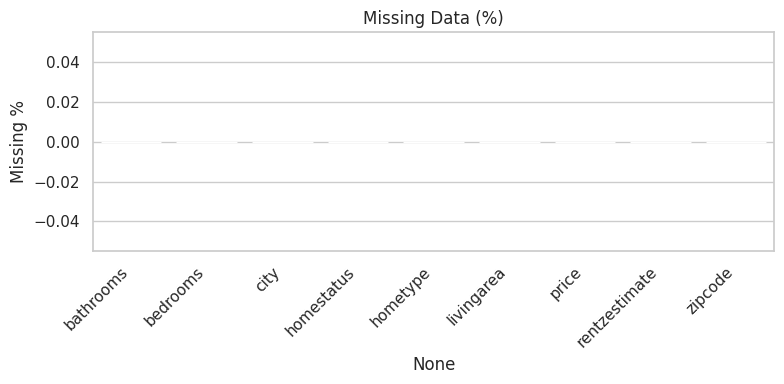

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(x=missing.index, y="Missing %", data=missing.reset_index().rename(columns={'index':'column'}))
plt.xticks(rotation=45, ha='right')
plt.title("Missing Data (%)")
plt.tight_layout()
plt.show()

In [21]:
df['rentzestimate'] = df['rentzestimate'].fillna('0')
df['bedrooms'] = df['bedrooms'].fillna('0')

Descriptive statistics

In [24]:
num_cols = ['price', 'rentzestimate', 'livingarea', 'bedrooms', 'bathrooms']
num_cols = [c for c in num_cols if c in df.columns]

display(df[num_cols].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T)

cat_cols = [c for c in ['hometype','homestatus','city','zipcode'] if c in df.columns]
for c in cat_cols:
    print(f"\nTop {c} values:")
    display(df[c].value_counts(dropna=False).head(20))


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
price,83.00,"2,881,070.95","7,420,170.39",1.00,"3,247.38","63,200.00","224,995.00","649,000.00","2,373,500.00","11,620,500.00","29,241,000.00","59,950,000.00"
livingarea,83.00,"2,784.52","3,043.79",22.00,193.38,853.00,"1,352.00","1,850.00","2,686.00","6,865.80","15,519.94","22,640.00"
bathrooms,83.00,4.07,4.97,0.00,0.82,1.00,2.00,3.00,4.00,9.90,19.86,42.00



Top hometype values:


,count
hometype,
SINGLE_FAMILY,32
CONDO,24
TOWNHOUSE,15
MULTI_FAMILY,9
MANUFACTURED,2
LOT,1



Top homestatus values:


,count
homestatus,
FOR_SALE,83



Top city values:


,count
city,
SANTA MONICA,42
HOUSTON,37
HUFFMAN,3
UNIVERSITY PLACE,1



Top zipcode values:


,count
zipcode,
90403,18
90404,10
90402,10
77007,4
77016,4
77336,3
77039,3
90401,2
77084,2


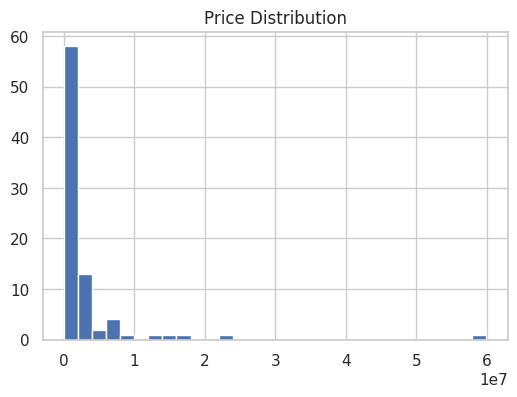

In [26]:
df['price'].hist(bins=30, figsize=(6,4))
plt.title("Price Distribution")
plt.show()


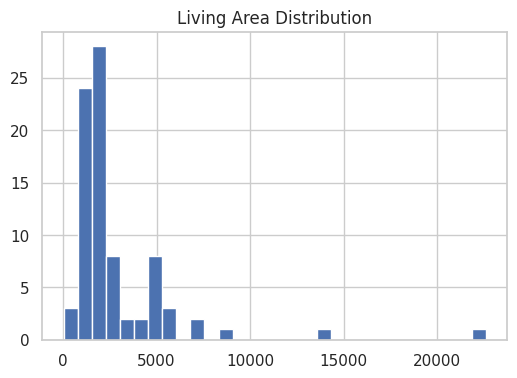

In [27]:
df['livingarea'].hist(bins=30, figsize=(6,4))
plt.title("Living Area Distribution")
plt.show()

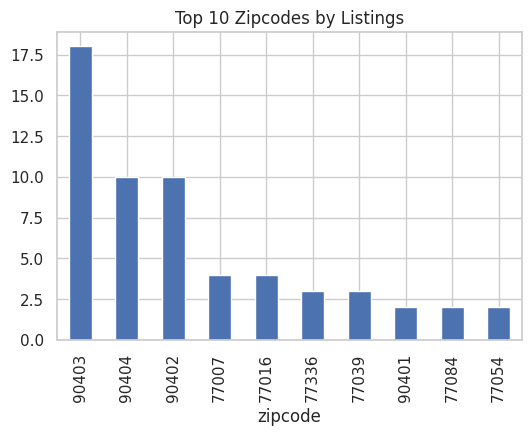

In [28]:
df['zipcode'].value_counts().head(10).plot(kind='bar', figsize=(6,4))
plt.title("Top 10 Zipcodes by Listings")
plt.show()

Scatter: price vs livingarea


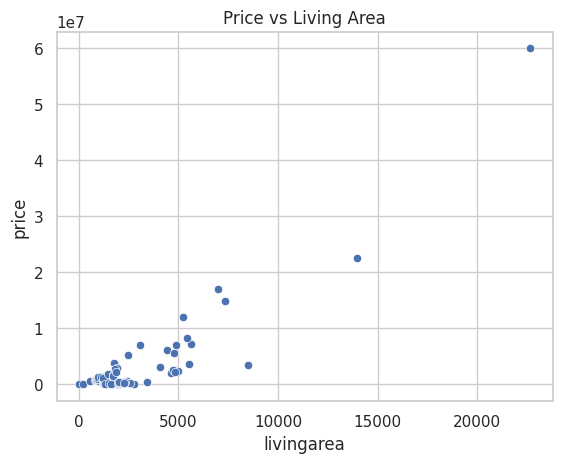

In [29]:
sns.scatterplot(x='livingarea', y='price', data=df)
plt.title("Price vs Living Area")
plt.show()

Correlation heatmap

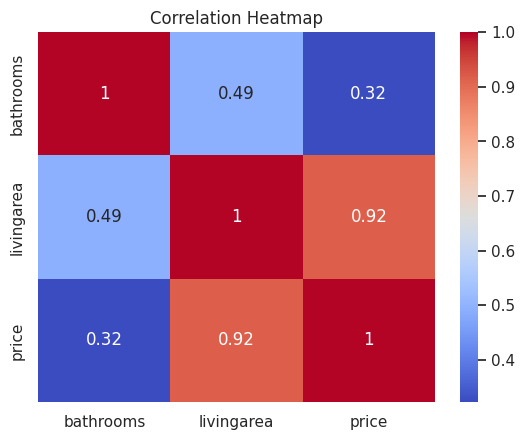

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()